In [1]:
import sys
import os
import glob
import random
from itertools import combinations

import numpy as np
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import prettypyplot as pplt

import pyemma
import mdtraj as md
import MDAnalysis as mda
from MDAnalysis.analysis import contacts

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


In [2]:
sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import util
import plotting

In [3]:
pplt.load_cmaps()
plt.style.use("custom")  # custom style sheet
plt.style.use("muted")  # muted color theme from SciencePlots
colors = mpl.colors.to_rgba_array(
    [
        "#364B9A",
        "#4A7BB7",
        "#6EA6CD",
        "#98CAE1",
        "#C2E4EF",
        "#EAECCC",
        "#FEDA8B",
        "#FDB366",
        "#F67E4B",
        "#DD3D2D",
        "#A50026",
    ]
)
cm_div = mpl.colors.LinearSegmentedColormap.from_list("diverging", colors)
mpl.colormaps.register(cm_div, force=True)

In [4]:
from joblib import Parallel, delayed
from multiprocessing import cpu_count
n_jobs = cpu_count()

In [5]:
topfile = "../../civsd-pro.psf"
files = []
remove = {1282,
    1283,
    1284,
    1285,
    1286,
    1288,
    1289,
    1290,
    1187,
    1188,
    1189,
    1190,
    1191,
    1197,
    1198,
    1199,
    1203,
    1205,
    1206,
    1207,
    1211,
    1212,
    1213,
    1214,
    1215,
    1225,
    1226,
    1227,
    1228,
    1231,
    1232,
    1233,
    1236,
    1237,
    1238,
    1242,
    1245,
    1246,
    1252,
    1253,
    1260,
    1261,
    1262,
    1263,
    1266,
    1267,
    1268,
    1269,
    1270,
    1271,
    1272,
    1273,
    1274,
    1275,
    1276,
    1277,
    1278,
    1279,
}
for i in range(295):
    if (i + 1000) not in remove:
        files.append(f"/project/dinner/scguo/anton-old/xtc1000ns/civsd-{i}.xtc")
for i in range(3, 82):
    files.append(f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc")
for i in range(83, 119):
    files.append(f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc")

In [6]:
len(files)

352

# Testing

In [7]:
u = mda.Universe(topfile, files[0])

In [8]:
sel_r226 = "protein and resid 226 and (name CZ or type NC*)" # guandinium group
sel_f161 = "protein and resid 161 and (not backbone) and (not name CB) and (not type H*)"
for a in u.select_atoms(sel_r226):
    print(a)
for a in u.select_atoms(sel_f161):
    print(a)

<Atom 1946: NE of type NC2 of resname ARG, resid 226 and segid A>
<Atom 1948: CZ of type C of resname ARG, resid 226 and segid A>
<Atom 1949: NH1 of type NC2 of resname ARG, resid 226 and segid A>
<Atom 1952: NH2 of type NC2 of resname ARG, resid 226 and segid A>
<Atom 894: CG of type CA of resname PHE, resid 161 and segid A>
<Atom 895: CD1 of type CA of resname PHE, resid 161 and segid A>
<Atom 897: CE1 of type CA of resname PHE, resid 161 and segid A>
<Atom 899: CZ of type CA of resname PHE, resid 161 and segid A>
<Atom 901: CD2 of type CA of resname PHE, resid 161 and segid A>
<Atom 903: CE2 of type CA of resname PHE, resid 161 and segid A>


In [9]:
cont = contacts.Contacts(u, select=(sel_r226, sel_f161), method='soft_cut', 

SyntaxError: unexpected EOF while parsing (302382694.py, line 1)

In [10]:
from MDAnalysis.analysis import distances

In [11]:
dist_mat = np.empty((4, 6))
r226_xyz = u.select_atoms(sel_r226).positions
f161_xyz = u.select_atoms(sel_f161).positions
dist_mat = distances.distance_array(r226_xyz, f161_xyz, box=u.dimensions, result=dist_mat)

In [12]:
dist_mat.shape

(4, 6)

In [13]:
dist_mat

array([[8.83539496, 8.86054752, 9.29633795, 9.72959455, 9.35787381,
        9.73678615],
       [8.22863859, 8.06360922, 8.44606359, 9.00136093, 8.85295945,
        9.16779649],
       [7.5361861 , 7.27718367, 7.4798395 , 7.95689054, 8.06142056,
        8.20785615],
       [8.55126237, 8.26964302, 8.73037182, 9.46178106, 9.34141812,
        9.71895542]])

In [14]:
rf161 = list(np.load("../../data/raw_feat/rf161.npy", allow_pickle=True))
rf161.extend(np.load("../../data/raw_feat/rf161_anton2.npy"))
rf161_arr = np.concatenate(rf161)
print(rf161_arr.shape)

(4150115, 3)


(array([158581., 379857., 457510., 306609., 193184., 188496., 207651.,
        219884., 313303., 397877., 287686., 169571., 105001.,  82656.,
         71182.,  59955.,  54264.,  53907.,  54326.,  49581.,  44259.,
         40433.,  36016.,  28155.,  22488.,  22245.,  25072.,  30779.,
         31863.,  24274.,  14488.,   7267.]),
 array([0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85,
        0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 ,
        1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95]),
 <BarContainer object of 32 artists>)

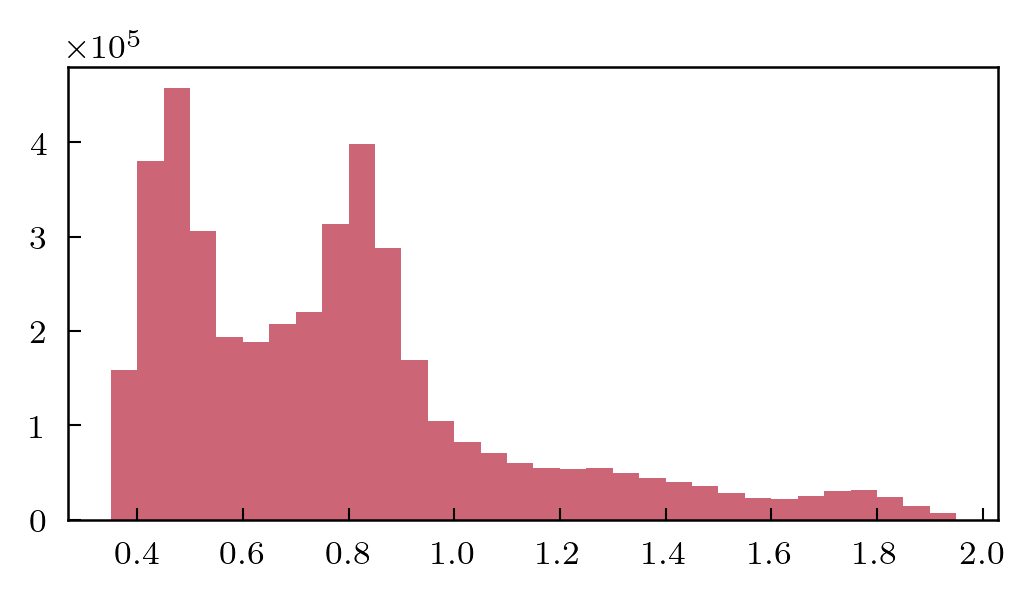

In [21]:
f = plt.figure(figsize=(4, 2), dpi=300)
plt.hist(rf161_arr[:, 1], bins=np.arange(0.35, 2.0, 0.05))

In [34]:
r0 = np.ones((4, 6)) * 4.0 # choose 3.5 Ang to be reference
dist_mat = np.ones((4, 6)) * 3.5
contacts.soft_cut_q(dist_mat, r0)

5.999999944575302

In [36]:
cont_traj = np.zeros(len(u.trajectory))
for i, _ in enumerate(u.trajectory):
    r226_xyz = u.select_atoms(sel_r226).positions
    f161_xyz = u.select_atoms(sel_f161).positions
    dist_mat = distances.distance_array(r226_xyz, f161_xyz, box=u.dimensions, result=dist_mat)
    cont_traj[i] = contacts.soft_cut_q(dist_mat, r0, beta=10, lambda_constant=1.0)

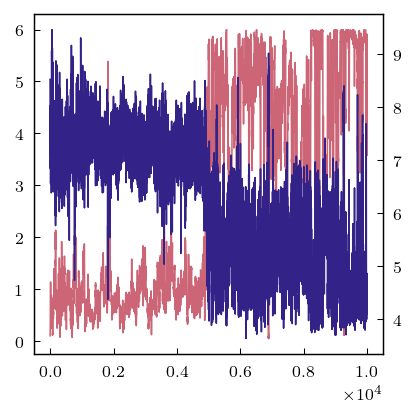

In [26]:
plt.plot(util.moving_average(cont_traj, 10))
plt.twinx()
plt.plot(rf161[0][:, 1] * 10, 'C1')

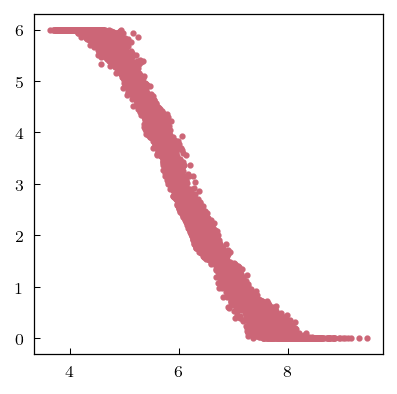

In [27]:
plt.scatter(rf161[0][:, 1] * 10, cont_traj)